# Exploratory Analysis
---
EE0005 Mini-project EE10

Group **Veriton**

Members: Hoi To, Joel Lee, Monicka, Yashwanth

---
We are ready to explore the relationship between columns and fraudulent. Based on our exploration below, we have found out that fake job postings are usually stated as 'full-time'. Many have no interview questions either. Futhermore, the a number of offering companies do not have a logo.

There is one more noticeable observation that most fake job postings are sharing the same company profile. They are originated from these 2 companies, 'aker solution' and 'Aptitude Staffing Solutions'. 

## Initialization


In [1]:
#Import libraries
import re
import string
import numpy as np
import pandas as pd
import seaborn as sb
sb.set_palette("pastel")
import matplotlib.pyplot as plt

In [2]:
jobData = pd.read_csv('Datasets/fake_job_postings.csv')

## Data overview

In [3]:
jobData.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
jobData.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [5]:
jobData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

## Correlation matrix

The correlation matrix visualises the relationship between the numeric data. The map below does not exhibit any strong positive or negative correlations between the numeric variables.

However, a moderate negative correlation can be observed between the 'fraudulent' variable and the 'has_company_logo' and 'has_questions' variables. When the posting doesn't require interviews or doesn't have a company logo, it is more likely to be fraudulent. 

There is also a mild positive correlation between the 'has_questions' and 'has_company_logo' variables, suggesting that the postings without questions also tend to be without a company logo. 

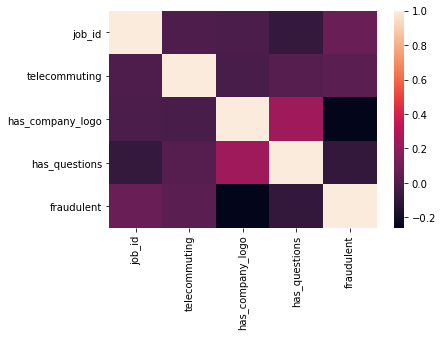

In [6]:
corr = jobData.corr()
sb.heatmap(corr)
plt.show()

## Employment type

In [7]:
# Converting fraudulent column to bool
jobData['fraudulent'] = jobData['fraudulent'].astype(bool)
jobData['fraudulent'].describe()

count     17880
unique        2
top       False
freq      17014
Name: fraudulent, dtype: object

<AxesSubplot:xlabel='fraudulent', ylabel='count'>

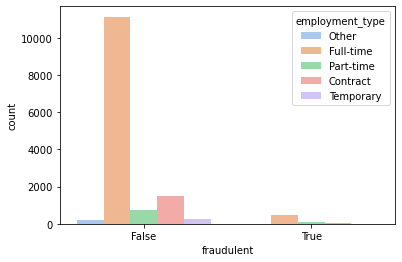

In [8]:
sb.countplot(x = 'fraudulent', hue = 'employment_type', data = jobData)

From this we can tell most fake jobs posted are full-time or with employment type not specified.

## `has_questions` and `has_company_logo`

In the following sections, we will be looking into some of the characteristics that differentiate fake job postings from the legitimate ones.

### How many of the fake postings have a recruitment process?

When analysing the relationship between fraudulent postings and their recruitment process, we discovered that a large percentage of fake job postings hire without holding an interview. 

> 71% of fake postings hire without any recruitment process

The plot below shows that 71% of the fraudulent postings hire were being offered without an interview to screen the applicants. The purpose of such listings is usually to scam the applicants and to gather their personal and financial data. As such, it makes sense that the scammers would make the barrier of entry for applicants low to attract more people to apply.

In [9]:
fakepostings = jobData[jobData.fraudulent]
fakepostings.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,True
144,145,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,True
173,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,True
180,181,Sales Executive,"PK, SD, Karachi",Sales,NaN,NaN,Sales Executive,Sales Executive,Sales Executive,0,0,0,NaN,NaN,NaN,NaN,Sales,True
215,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,True


No questions: 616
Has questions: 250


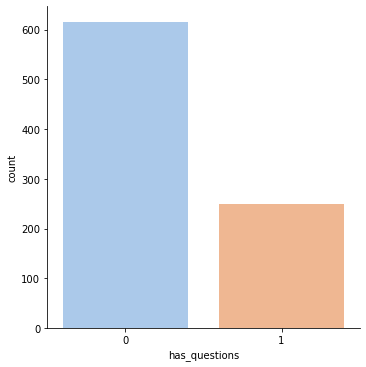

In [10]:
print(f"No questions: {fakepostings.has_questions[fakepostings.has_questions==False].count()}")
print(f"Has questions: {fakepostings.has_questions[fakepostings.has_questions==True].count()}")
sb.catplot(x = 'has_questions', data = fakepostings, kind="count")

### Similarly, a large percentage of the fake postings also do not have a logo attached to the companies. 
Only 32% of the companies listed in the fake job postings have a company logo.

No logo: 583
Has logo: 283


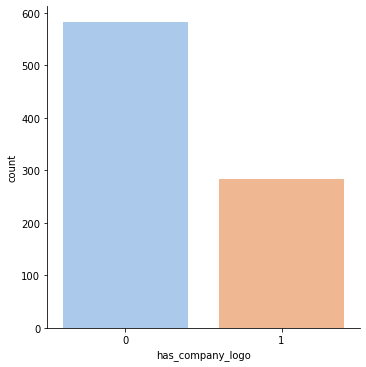

In [11]:
print(f"No logo: {fakepostings.has_company_logo[fakepostings.has_company_logo==False].count()}")
print(f"Has logo: {fakepostings.has_company_logo[fakepostings.has_company_logo==True].count()}")
sb.catplot(x = 'has_company_logo', data = fakepostings, kind="count")

## Required experience

From the graph below, it can be seen that the majority of legitimate postings require a Mid-Senior level of experience. Whereas, the fraudulent postings are mostly for entry level jobs.

In [12]:
# Extracting real postings
for col in jobData.columns:
    realpostings = jobData.loc[jobData[col] == False]

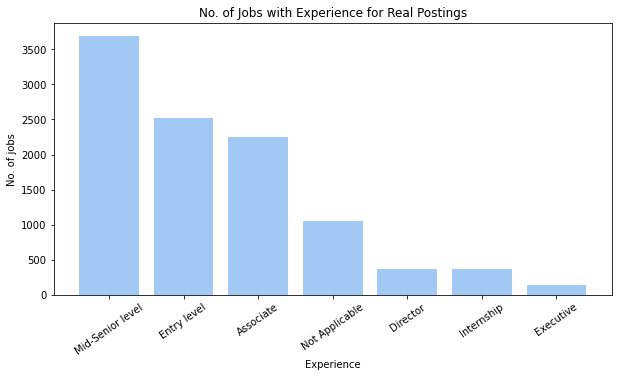

In [13]:
# Required experiences for real jobs
experience = dict(realpostings.required_experience.value_counts())
plt.figure(figsize=(10,5))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience for Real Postings')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

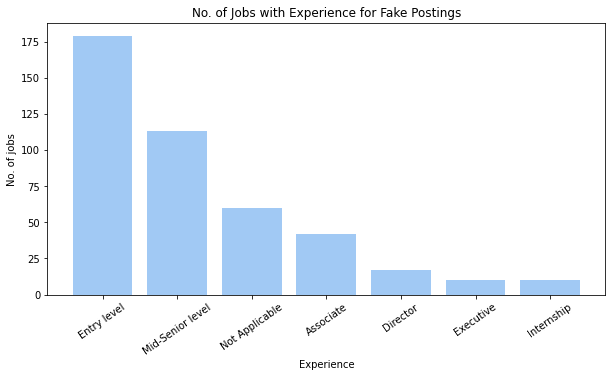

In [14]:
# Required experiences for fake jobs
experience = dict(fakepostings.required_experience.value_counts())
plt.figure(figsize=(10,5))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience for Fake Postings')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

## Required education

With reference to the plots below, majority of the legitimate job postings require at least a bachelor's degree. Whereas, most fake postings only require a highschool diploma or its equivalent. 

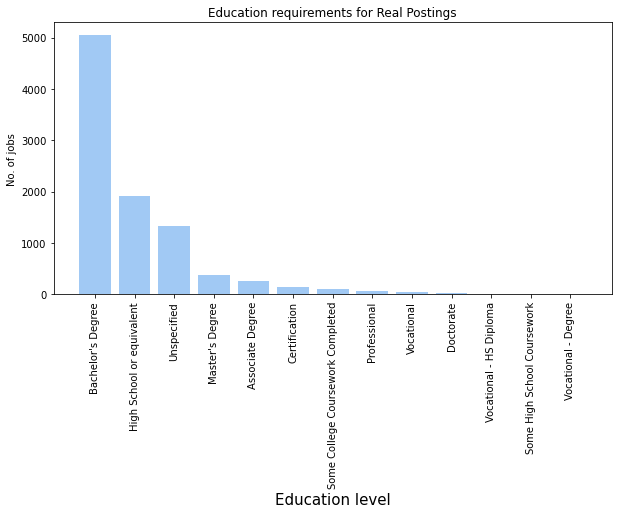

In [15]:
# Required education for real jobs

experience = dict(realpostings.required_education.value_counts())
plt.figure(figsize=(10,5))
plt.bar(experience.keys(), experience.values())
plt.title('Education requirements for Real Postings')
plt.xlabel('Education level', size=15)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=90)
plt.show()

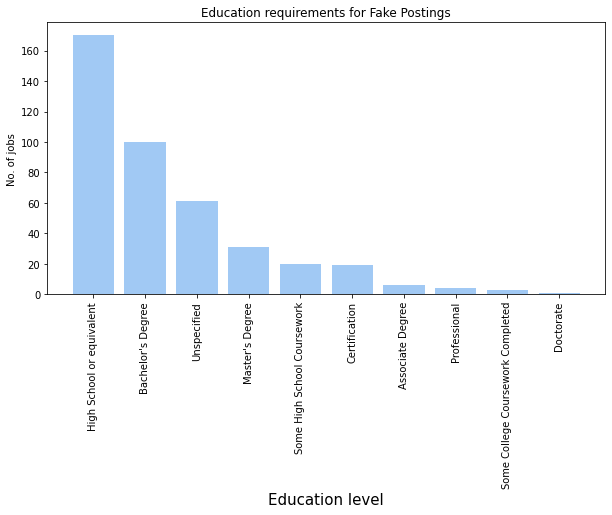

In [16]:
# Required education for fake jobs

experience = dict(fakepostings.required_education.value_counts())
plt.figure(figsize=(10,5))
plt.bar(experience.keys(), experience.values())
plt.title('Education requirements for Fake Postings')
plt.xlabel('Education level', size=15)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=90)
plt.show()

## Text exploration

A lot of the fraudulent is generated from the same source. That source can generate more than 30 fake entries, all with almost the same data in certain fields. For example, one source generates over 30 fake postings for "Aptitude Staffing Solutions", all with the exact same text in the company profile field.

To show this, groupby is used. First, we filter results to obtain only fraudulent results. From those fraudulent results, all entries with the same company profile, description, title, requirements, department, benefits are grouped together. From the groupby object, the counts of each group is obtained. **The count shows how many fraudulent entries have the exact same text field, hence how many fake postings come from the same source.**

In [17]:
fakepostings.groupby('company_profile').count().sort_values('fraudulent', ascending=False)[['fraudulent']].head(20)

,fraudulent
company_profile,
"Aptitude Staffing Solutions has redesigned the recruiting wheel. Our innovative new platform cuts the recruiting time in half, yields scientifically-proven results and clients and candidates enjoy a pleasant experience through advanced, simple to use technology and a tenured, industry-experienced recruiting team. Join us in a fresh new experience of leveraging your career...the way it should be! All represented candidates enjoy the following perks:Expert negotiations, maximizing total compensation package Signing bonus by Aptitude Staffing in addition to client signing bonus (if applicable)1 Year access to AnyPerkRelocation Services for out of town candidatesContinued education in your area of profession, seminars, workshops and other skill development events Contract employees receive quarterly bonuses for the duration of their project Direct-Hire employees receive double bonues ($2,000) per referred/recruited candidate into their newly appointed companyAll candidates are encouraged to participate in our Referral Bonus Program &amp; earn $500 - $1,000 per hired referral",35
"Aker Solutions is a global provider of products, systems and services to the oil and gas industry. Our engineering, design and technology bring discoveries into production and maximize recovery from each petroleum field. We employ approximately 28,000 people in about 30 countries. Go to #URL_0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae# for more information on our business, people and values.",31
"Staffing &amp; Recruiting done right for the Oil &amp; Energy Industry!Represented candidates are automatically granted the following perks: Expert negotiations on your behalf, maximizing your compensation package and implimenting ongoing increases Significant signing bonus by Refined Resources (in addition to any potential signing bonuses our client companies offer)1 Year access to AnyPerk: significant corporate discounts on cell phones, event tickets, house cleaning and everything inbetween. You'll save thousands on daily expenditures Professional Relocation Services for out of town candidates* All candidates are encouraged to participate in our Referral Bonus Program ranging anywhere from $500 - $1,000 for all successfully hired candidates... referred directly to the Refined Resources teamPlease submit referrals via online Referral FormThank you and we look forward to working with you soon! [ Click to enlarge Image ]",21
"We have aggressive growth plans in place for the coming years. We provide a much needed service in facilitating the growth of small and medium size business with innovative financing products to their clients.We, at Oak Tree Financing, commit our energies, intellect and knowledge to helping small and medium size business owners and entrepreneurs with extraordinary financing solutions to clients. We believe in providing the highest possible level of service and delivering superior results. We are committed to their financial well-being. With 67% of the population having No Credit or Bad Credit our financing products have helped business owners increase their sales on average by 30%.",20
"The Accion story began more than 100 years ago in the Austin,Tx with one family owned establishment. Today, Accion has grown into a nationwide Organazation with over 260 stores. Accion success is attributed to our unique niche in the market offering current finance option at competitive prices paired with customer service and a personal shopping experience. Join the Accion story today!",16
"As the industry’s largest supply contracting company, Novation serves the purchasing needs of more than 65,000 VHA, UHC and Provista member organizations and their affilliates. Novation delivers unmatched supply savings and value through its sourcing services, as well as information and data services. Through its affiliation with VHA, UHC and Provista, Novation represents the largest purchasing volume in the industry more t

In [18]:
fakepostings.groupby('description').count().sort_values('job_id', ascending=False)[['fraudulent']].head(20)

,fraudulent
description,
"We are a full-service marketing and staffing firm, serving companies ranging from Fortune 100 to new start-up organizations. We work with job seekers in an equally broad range, from light industrial temporary workers to executive level candidates.Are you looking for a Work from Home Opportunity where you can earn up to $2500 and more per week? Our Online Service Representative position would be perfect for you!- Set your own hours - Make money every time you decide to work - Work remotely from home - Get paid weekly - If you have a computer with internet, this is for you",22
ACCEPTING ONLINE APPLICATIONS ONLYClick Here To Apply This is a Full Time Temporary Position Lasting for 2 yearsDescriptionValidate and review legal contractual agreements for customers Input contract into contract databases All contracts completed &amp; reviewed within per-determined service level agreement Professional e-mail interaction with customers Scanning and uploading of documents QualificationsHigh School Diploma or Equivalent Professional Communication Skills via e-mail interactionDedicated to the needs of the business Project management skills to assist in facilitating multiple contract rejects Detail oriented Able to multi-taskAbility to work with time sensitive documents Must be able to work independently but able to perform in a team environment when needed. Fast and accurate typist ACCEPTING ONLINE APPLICATIONS ONLYClick Here To Apply,21
"We have several openings available in this area earning $1000.00-$2500.00 per week. We are seeking only honest, self-motivated people with a desire to work in the home typing and data entry field, from the comfort of their own homes.The preferred applicants should be at least 18 years old with Internet access. No experience is needed. However the following skills are desirable:",21
"We are seeking individuals to be connected with companies who are hiring employees directly to work from their homes. You will find both full-time and part-time opportunities in a variety of career fields including but not limited to: data entry, customer support, billing, typing, and administrative.These positions guarantee wages ranging from $12 per hour up to six figure salary. This includes bonuses, benefits, and flexibility over your work schedule.Legitimate work from home jobs are going to require that you have skills relevant to the position you’re applying for. Training is provided based on the position.",20
"6* Ultra Luxury American Cruise Company is urgently looking for the following positions:*Hospitality - For the many Bars &amp; Restaurants on board.*Retail - For the Duty FREE Shops &amp; Boutiques on board.*housekeeping - For the Housekeeping &amp; Cleaning jobs.*Office Admin - For the Front desk &amp; Tour booking jobs*Other Positions - DJ's, Security Staff, Photographers &amp; Nannies.Vessel type or operation: 6* Ultra Luxury Cruise.Certification &amp; Experience: Previous experience (not Required)Good English speaker, Some Customer Service Skills, wanting to learn &amp; work.Job Type: Perm.Sailing Area: World wide.Benefits: On board en suite accommodation and food, Medical cover for duration of contract, world work visa, free wifi, TAX FREE Salary &amp; more!Job Description:A 6* Ultra Luxury Cruise Company are looking to recruit hardworking, enthusiastic cruise personal. This exciting opportunity is available to candidates who are willing to Learn, work &amp; are flexible.Candidate will also have Some Customer Service Skills, skills in Public Relations and are Good English speakers. Rotation is 4 months on 2 months off. Great Salary in Euros (TAX FREE) Pay is discussed via communication after full application proccess.If you are looking for a new adventure.. APPLY TODAY!Please send your resume to: #EMAIL_6e824a2834da27298c6d199e4d1829b32ca54fc0bacb0acf6d748f04fc69953b# (coppy &amp; paste this e-mail address)We will contact you shortly after within 24 hours.Looking forward to have you A

In [19]:
fakepostings.groupby('title').count().sort_values('job_id', ascending=False)[['fraudulent']].head(20)

,fraudulent
title,
Home Based Payroll Typist/Data Entry Clerks Positions Available,21
Cruise Staff Wanted *URGENT*,21
Data Entry Admin/Clerical Positions - Work From Home,21
Customer Service Representative,17
Administrative Assistant,16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily,12
Network Marketing,10
Payroll Data Coordinator Positions - Earn $100-$200 Daily,10
Payroll Clerk,10


In [20]:
fakepostings.groupby('benefits').count().sort_values('job_id', ascending=False)[['fraudulent']].head(20)

,fraudulent
benefits,
"Benefits: On board en suite accommodation and food, Medical cover for duration of contract, world work visa, free wifi, TAX FREE Salary &amp; more!",21
All you need is access to the Internet and you can participate. This is an entry level position and we offer full online training. You do NOT need any special skills to get started.Earn as much as you can from the comfort of your home typing and doing data entry. Complete Training provided before you start working and it’s easy to start! ________________________________________Don’t let this opportunity pass you by.POSITIONS ARE STILL AVAILABLE - GET STARTED RIGHT NOWApply at: #EMAIL_c9b5d8a60f3d80be13dd02ffe5d212c047b92ba679c296dfae7c102952fbb534#,21
We offer• Friendly colleagues in an industry with a bright future.• An environment where you are encouraged to develop your skills and share your knowledge with your colleagues.• Competitive benefits and strong focus on work-life balance.,18
As per job,11
"This is an entry level position and we offer full online training. You do NOT need any special skills to get started.Earn as much as you can doing data entry. Complete Training provided before you start working and it’s easy to start! ________________________________________Don’t let this opportunity pass you by.POSITIONS ARE STILL AVAILABLE - GET STARTED RIGHT NOWIf you fit the above description and meet the requirements, please apply stating your locationApply at: #EMAIL_c9b5d8a60f3d80be13dd02ffe5d212c047b92ba679c296dfae7c102952fbb534#",10
"We Provide- Complete online training and office support- Flexible working environment- An exciting and lucrative opportunity for those with a proven results background- Rapid advancement for those highly motivated- Average yearly income of $80-$130,000 based on our straight commission compensation model",10
"This is an entry level position and we offer full online training. You do NOT need any special skills to get started.Earn as much as you can doing data entry. Complete Training provided before you start working and it’s easy to start! ________________________________________Don’t let this opportunity pass you by.POSITIONS ARE STILL AVAILABLE - GET STARTED RIGHT NOWIf you fit the above description and meet the requirements, please apply stating your locationApply at: #EMAIL_3720fb437cf9ea0fba89dddcb596c3afd772be237f383163a3d18e00e4c65595#",9
"Weekly pay, PTO, Paid Holidays, 401 k",8
"Compensation/benefits package includes:Comprehensive benefits package, including a 401k with matchingCompetitive wages, based on education and experience",8


In [21]:
fakepostings.groupby('requirements').count().sort_values('job_id', ascending=False)[['fraudulent']].head(20)

,fraudulent
requirements,
"RequirementsAll you need is access to the Internet and you can participate. Computer with Internet access, valid email address, good typing skills",22
"Certification &amp; Experience: Previous experience (not Required)Good English speaker, Some Customer Service Skills, wanting to learn &amp; work.",21
"Basic computer and typing skills, ability to spell and print neatly, ability to follow directions.",21
Home Office SuppliesComputer with internet accessQuiet work area away from distractionsMust be able to work independently and get the job done with little guidance.,20
"Experience and Skills Required- Minimum of 3 years of sales experience- Ability to work in a home office environment- Exceptional speaking, writing, and negotiation skills- You must be a motivated self starter and instil that others- College degree",19
No any experience required.,15
"**NOTE: You must have the necessary tools for perform any of the above tasks**SUBJECT TO PASS A BACKGROUND CHECK** If you know how to perform WINTERIZATION in property is a plus. You must have a Digital Camera with to take photographs supporting work done. We also require the use of email. This work is time sensitive, so a strong work ethic is preferred. **NOTE: Please be sure to include your full name, the City where you are located at and phone number and email in order to be considered for the position. If your name, phone #, and email are not in the response, your response will be deleted. Thanks and we look forward to hearing from you!",11
"An ambition to succeed, A desire to be the best at our field and not be discourage when people turn you down. If you have these qualities than you are perfect for this business",10
Home Computer with Internet AccessBasic Computer SkillsA Headset,8


In [22]:
fakepostings.groupby('department').count().sort_values('job_id', ascending=False)[['fraudulent']].head(20)

,fraudulent
department,
Engineering,46
Clerical,27
Oil & Energy,24
Information Technology,15
Administrative,14
Customer Service,14
Information Technology,12
Sales,12
Engineering,9
